# Data Analysis for NBA Fantasy Regression 

In [19]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
df=pd.read_csv(r'data-files/Seasons_Stats.csv')
df=df[df.Year>=1990]
df.drop('Unnamed: 0',axis=1,inplace=True)

In [21]:
fantasy_data=pd.read_csv(r'data-files/fantasy_stats.csv')
fantasy_data.drop('Unnamed: 0',axis=1,inplace=True)

In [22]:
data=pd.merge(df,fantasy_data,right_on=['Player','Year','Pos', 'PTS', 'AST', 'TRB',
       'BLK', 'STL', 'TOV', '3P','FT'],left_on=['Player','Year','Pos', 'PTS', 'AST', 'TRB',
       'BLK', 'STL', 'TOV', '3P','FT'], how='inner')

In [23]:
#data.drop('Unnamed: 0',axis=1,inplace=True)
data.drop('index',axis=1,inplace=True)
data.dropna(axis=1,inplace=True)

In [24]:
data['MPG']=np.round(data['MP']/data['G'],2)

In [25]:
data['Fantasy_PPG']=data['Fantasy_Pts']/data['G']

In [26]:
data.to_csv(r'data-files/clean_data.csv')

In [27]:
correlated_data=data.corr()

In [28]:
correlated_data['Fantasy_PPG'][correlated_data['Fantasy_PPG']>0.55].head()

GS     0.796430
MP     0.854774
PER    0.776122
OWS    0.774480
DWS    0.706132
Name: Fantasy_PPG, dtype: float64

In [29]:
#Creating dataframe with the identified relevant features based on correlation 
train_data=data[['Player','MPG','PER','OWS','DWS','WS','OBPM','BPM','VORP','Years_Played','Fantasy_PPG']]
train_data.head()

,Player,MPG,PER,OWS,DWS,WS,OBPM,BPM,VORP,Years_Played,Fantasy_PPG
0,Mark Acres,21.14,8.3,1.1,0.6,1.6,-2.2,-2.0,0.0,10.0,12.034375
1,Michael Adams,34.05,15.4,4.4,2.5,6.9,2.7,1.7,2.5,4.0,32.332278
2,Mark Aguirre,25.71,15.8,3.1,2.5,5.7,1.1,0.6,1.3,2.0,21.192308
3,Danny Ainge,36.36,16.1,2.7,2.1,4.8,2.2,1.6,2.5,12.0,34.583333
4,Mark Alarie,23.09,14.1,1.5,1.6,3.1,-0.4,-1.0,0.5,9.0,19.405488


In [30]:
max(train_data['PER'])

40.2

In [31]:
train_data[train_data['PER']==max(train_data['PER'])]

,Player,MPG,PER,OWS,DWS,WS,OBPM,BPM,VORP,Years_Played,Fantasy_PPG
1512,Darrell Armstrong,2.67,40.2,0.1,0.0,0.1,31.7,34.8,0.1,1.0,6.5


In [32]:
## Yearly Progression of Minutes Played:
x=list(set(train_data['Years_Played']))

#y variables
y=[]

for i in x:
    
    y.append([np.mean(train_data['MPG'][train_data['Years_Played']==i]),np.mean(train_data['PER'][train_data['Years_Played']==i]),
                np.mean(train_data['OWS'][train_data['Years_Played']==i]),np.mean(train_data['DWS'][train_data['Years_Played']==i]),
                np.mean(train_data['WS'][train_data['Years_Played']==i]),np.mean(train_data['OBPM'][train_data['Years_Played']==i]),
                np.mean(train_data['BPM'][train_data['Years_Played']==i]),np.mean(train_data['VORP'][train_data['Years_Played']==i]),
                np.mean(train_data['Fantasy_PPG'][train_data['Years_Played']==i])])

<Figure size 3888x2448 with 0 Axes>

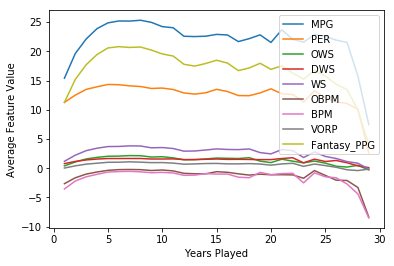

<Figure size 3888x2448 with 0 Axes>

In [33]:
plt.plot(x,y)
plt.legend(('MPG', 'PER', 'OWS','DWS','WS','OBPM','BPM','VORP','Fantasy_PPG'))
plt.xlabel('Years Played')
plt.ylabel('Average Feature Value')
plt.figure(figsize=(54,34))

In [34]:
#Creating a dictionary of percentage change each year in Minutes Per Game 
Minute_Curve={}

for i in range(0,len(y)):
    if i!=28:
        
        Minute_Curve[float(i)]=(y[i+1][0]-y[i][0])/y[i][0]

In [35]:
#Creating a dictionary of percentage change each year in PER per game
PER_Curve={}

for i in range(0,len(y)):
    if i!=28:
        
        PER_Curve[float(i)]=(y[i+1][1]-y[i][1])/y[i][1]

In [36]:
#Creating a dictionary of percentage change each year in PER per game
WS_Curve={}

for i in range(0,len(y)):
    if i!=28:
        
        WS_Curve[float(i)]=(y[i+1][4]-y[i][4])/y[i][4]

In [262]:
OWS_Curve={}

for i in range(0,len(y)):
    if i!=28:
        
        OWS_Curve[float(i)]=(y[i+1][2]-y[i][2])/y[i][2]

### As Shown in the graph above, many of the advanced analytics do not change much throughout an NBA players career with the exception of minor fluctuations, with the exceptions of PER (Player Efficiency Rating and Minutes Per Game)  

In [38]:
#Calculating Variance to see if the assumption is true, the variance a measure of the deviation from the mean
variances=[]
temp=[]
for i in range(5,8):
    for j in range(0,len(y)):
        temp.append(y[j][i])
    variances.append(np.std(temp[i])*np.std(temp[i]))

In [39]:
#Can see almost zero variance on VORP, BPM, WS, OWS, DWS
variances

[0.0, 0.0, 0.0]

In [40]:
#Arbitary Looking at a player like LeBron James 
names=list(set(train_data['Player']))
VORP_variances=[]
for i in names:
    VORP_variances.append(np.power(train_data[['VORP']][train_data['Player']==i].std(),2))
VORP_variances = [x for x in VORP_variances if str(x) != 'VORP   NaN\ndtype: float64']
VORP_variances=np.power(VORP_variances,2)
np.mean(VORP_variances)

1.3900000032202577

[[2.62440000e-02]
 [4.97290000e+00]
 [2.75375057e-01]
 ...
 [7.23513932e+00]
 [3.77405444e+01]
 [1.10880900e+00]]


/home/addybrown/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


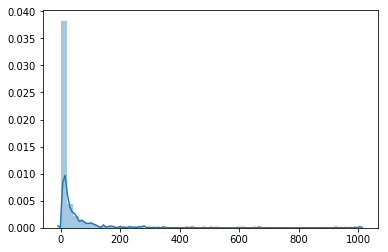

In [41]:
names=list(set(train_data['Player']))
WS_variances=[]
for i in names:
    WS_variances.append(np.power(train_data[['WS']][train_data['Player']==i].std(),2))
WS_variances = [x for x in WS_variances if str(x) != 'WS   NaN\ndtype: float64']

WS_variances=np.power(WS_variances,2)
print(WS_variances)
np.mean(WS_variances)
sns.distplot(WS_variances)

### Can see that variance is quite low for both Winshare and VORP (Value Over Replacement Player) both on a mean as compared to year by year and on an individual basis for each player. For winshares in particular, it seems that the distribution almost follows a chi-squared distribution, meaning that the variability in winshare can be inputted as chi-squared noise (maybe assume gaussian noise)

In [271]:
'''
This is the advantage of using the advanced analytics to predict my League's Fantasy Points
1) very little change or variance between most advanced statistics meaning good players generally remain good through the
main parts of their career.

2) Can create a small regression model to predict how a players efficiency will change as a result of the year to predict the 
next years fantasy output. 

'''

"\nThis is the advantage of using the advanced analytics to predict my League's Fantasy Points\n1) very little change or variance between most advanced statistics meaning good players generally remain good through the\nmain parts of their career.\n\n2) Can create a small regression model to predict how a players efficiency will change as a result of the year to predict the \nnext years fantasy output. \n\n"

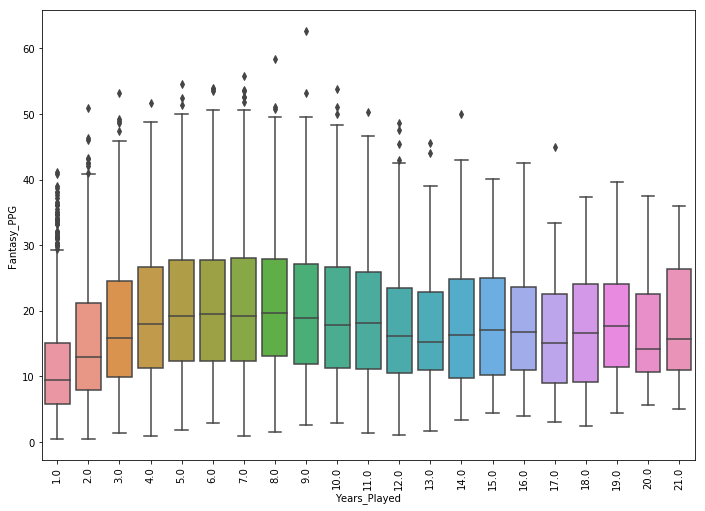

In [42]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
plt.xticks(rotation='vertical')
sns.boxplot(x=train_data['Years_Played'][train_data['Years_Played']<=21],y=train_data['Fantasy_PPG'][train_data['Years_Played']<=21]) 

### Can see that players around the 7th year generally perform better with respect to their fantasy points, there is however quite a bit of variance 

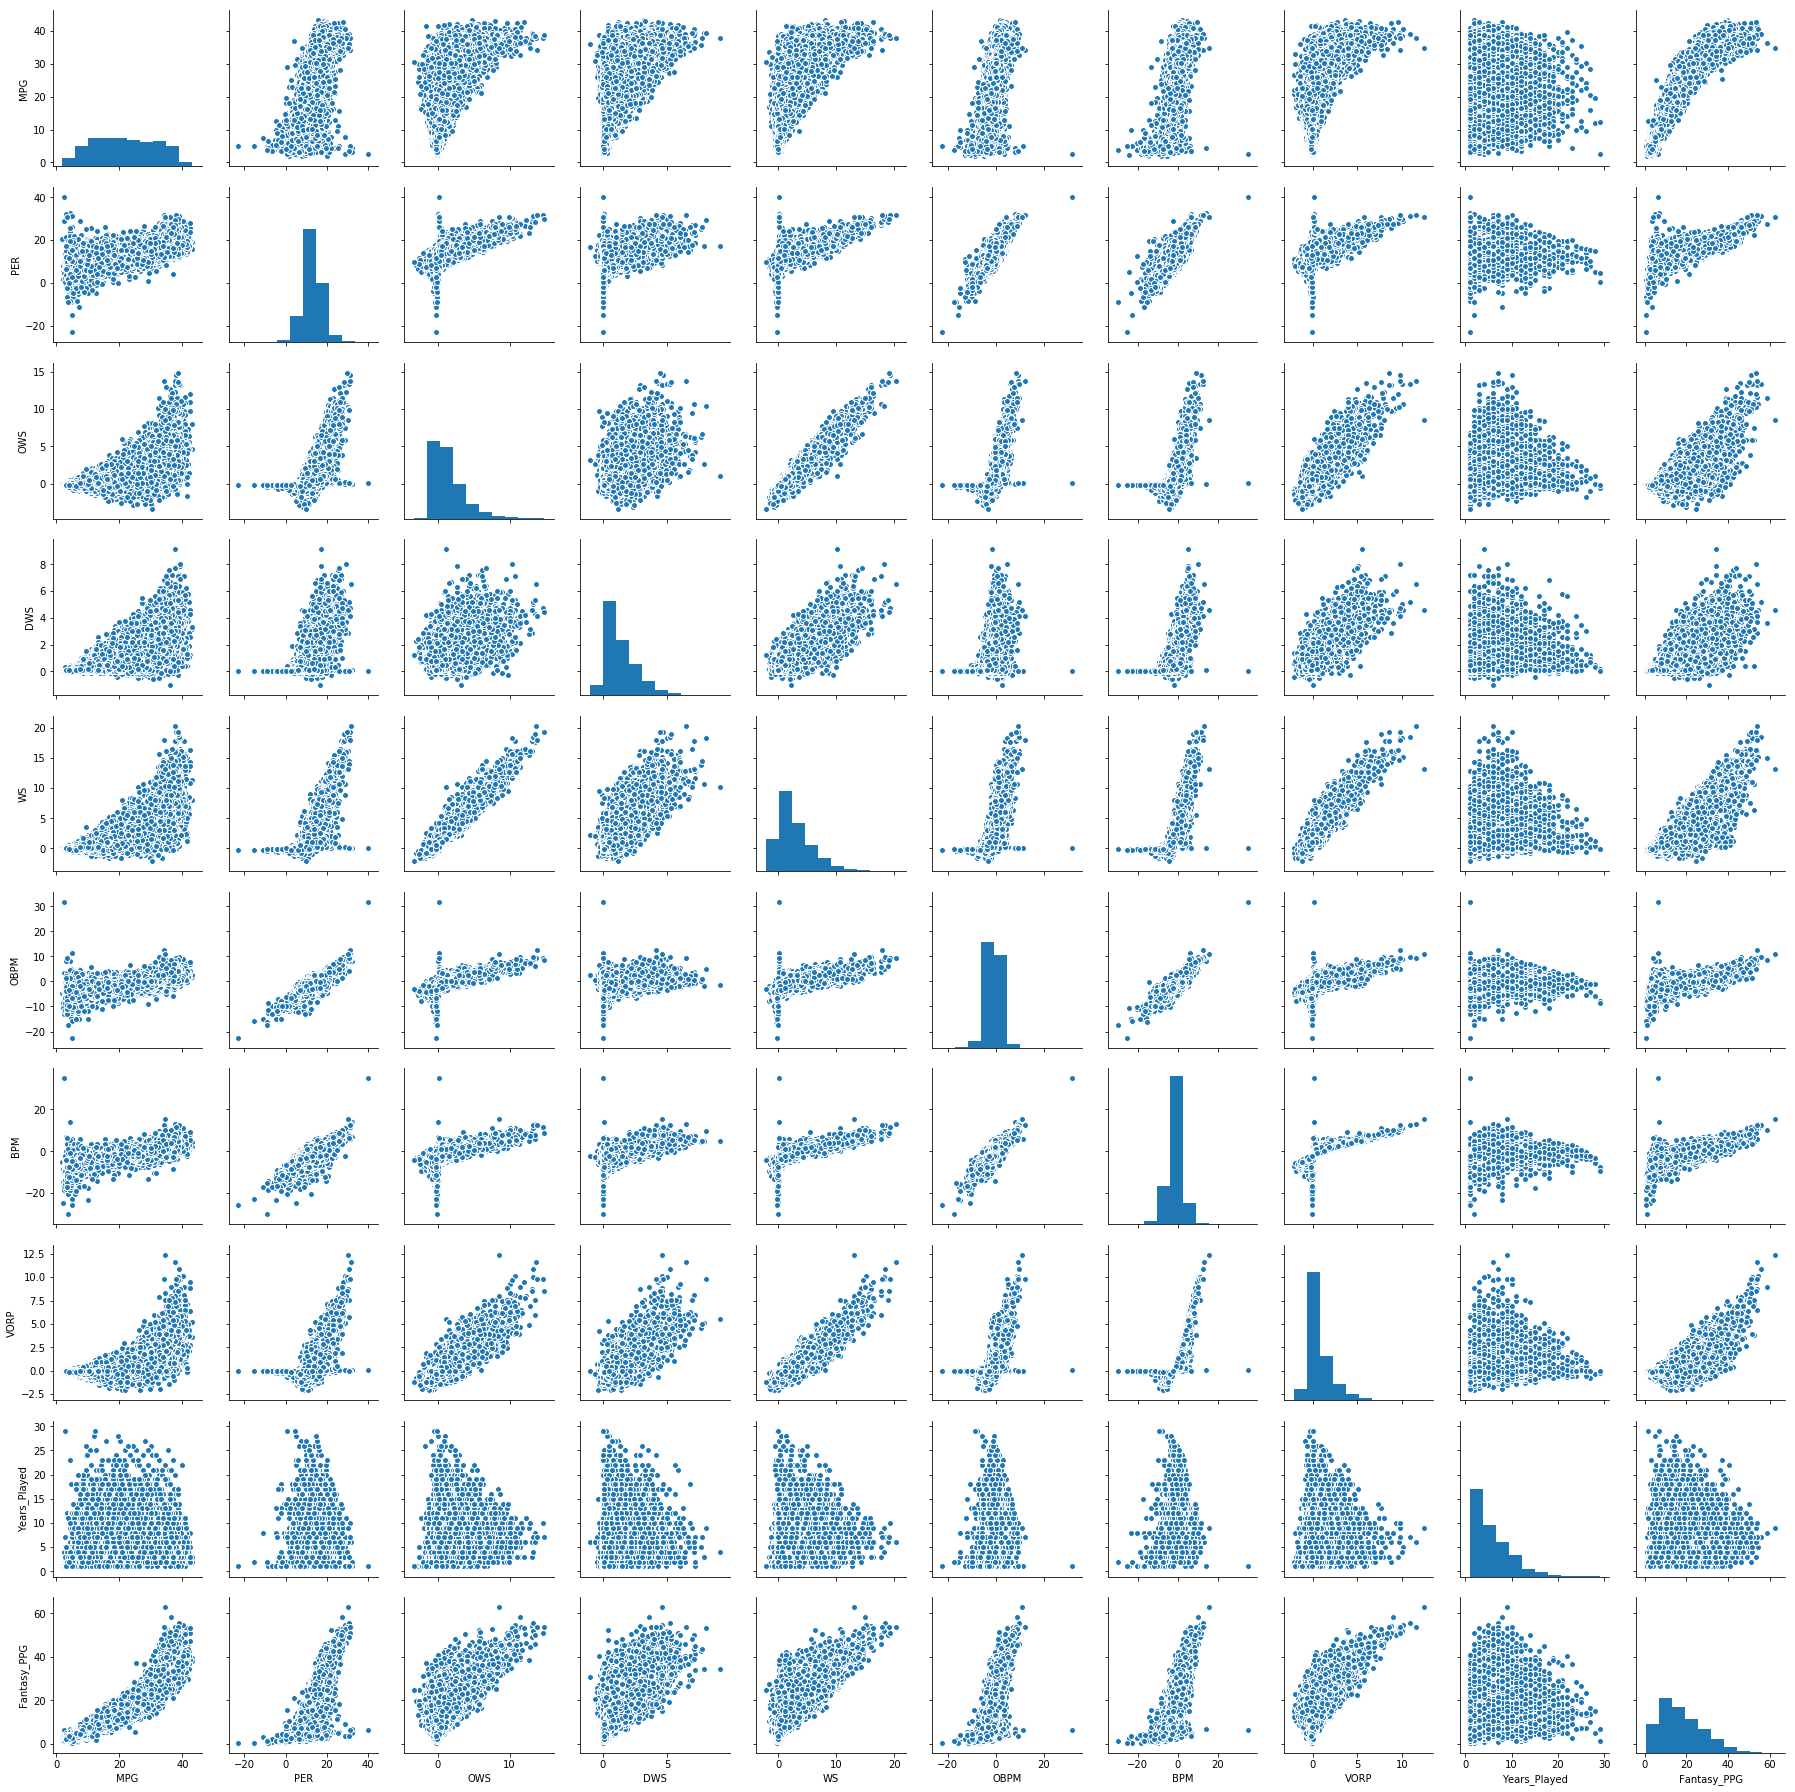

In [283]:
sns.pairplot(train_data)

## Can see from the Fantasy_PPG tab that there is a decent amount of correlation between many of the varibles that should make them good candidates to develop a regression model

/home/addybrown/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


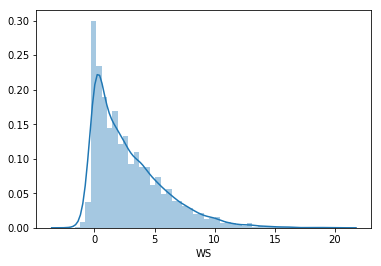

In [43]:
sns.distplot(data['WS'])

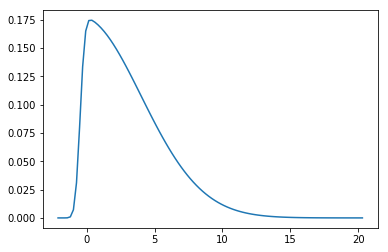

In [158]:
from scipy.stats import skewnorm
import numpy as np
X = np.linspace(min(data['WS']), max(data['WS']),100)
Y = skewnorm.pdf(X, *skewnorm.fit(data['WS']))
plt.plot(X,Y)

### Observations: Can see that the WS distribution plotted from the year 1990, roughly follows a skewed normal distribution. 

/home/addybrown/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


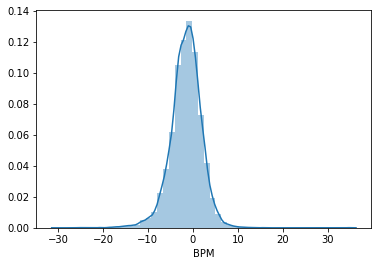

In [183]:
sns.distplot(data['BPM'])

### Observation: BPM follows what seems to be a regular normal distribution

#### The Change in both BPM and WS statistics can be inputted as random noise with respect to their distributions. For WS the sign will be found using the WS percentage difference dictionary displayed above. 

In [287]:
'''

We also know from the Figure above that there is an effect of Years Played on the amount of minutes

'''

'\n\nWe also know from the Figure above that there is an effect of Years Played on the amount of minutes\n\n'

In [394]:
'''
Generating data for 2018/2019 NBA season 
'''

'\nGenerating data for 2018/2019 NBA season \n'

In [272]:
#data cleaning 2017/2018 dataframe
szn_2017_2018=pd.read_csv(r'data-files/2017_2018_Full.csv')
szn_2017_2018['MPG']=szn_2017_2018['MP']/szn_2017_2018['G']
szn_2017_2018.head()


szn_2017_2018['Player']=szn_2017_2018['Player?']
szn_2017_2018['Player']=szn_2017_2018['Player'].apply(lambda x: x[:x.find('\\')])
szn_2017_2018=szn_2017_2018[['Player','MPG','PER','VORP','WS','OWS','DWS','BPM','OBPM']]
preds_2019=szn_2017_2018[['Player','MPG','PER','VORP','BPM','OBPM','WS','OWS','DWS']]
preds_2019['BPM']=preds_2019['BPM'] + np.random.normal(np.mean(data['BPM']),1,len(preds_2019))
preds_2019['OBPM']=preds_2019['OBPM'] + np.random.normal(np.mean(data['OBPM']),1,len(preds_2019))
#preds_2019['PER']=preds_2019['PER'] + np.random.normal(np.mean(data['PER']),1,len(preds_2019))

#Creating the 2018/2019 nba season sheet 
BPM_2019=pd.read_excel(r'data-files/2018_2019_BoxPlus_Minus.xlsx',sheet_name='Sheet1')
preds_2019=szn_2017_2018
preds_2019=pd.merge(preds_2019,BPM_2019,how='inner',left_on='Player',right_on='Player')
preds_2019['BPM']=preds_2019['Agg']
preds_2019['OBPM']=preds_2019['Off(+)']
preds_2019=preds_2019[['Player','VORP','BPM','OBPM','WS','OWS','DWS']]
preds_2019.head()

In [273]:
player_names=list(set(data['Player']))
temp_data=pd.DataFrame()
for i in player_names:
    val=data['Years_Played'][data['Player']==i].argmax()
    #print(val)
    t_data=data.loc[val,['Player','Years_Played']]
    #print(t_data)
    temp_data=temp_data.append(t_data)
    #print(temp_data)
temp_data['Years_Played'][temp_data['Player']=='Tristan Thompson']=temp_data['Years_Played'][temp_data['Player']=='Tristan Thompson']+2.0

/home/addybrown/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  after removing the cwd from sys.path.
/home/addybrown/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [274]:
#temp_data=data[['Player','Years_Played']][data['Year']==2017.0]
for_preds=pd.merge(temp_data,preds_2019,how='right',right_on='Player',left_on='Player')
for_preds.index=for_preds['Player']
for_preds=for_preds[['Years_Played','PER','BPM','OBPM','VORP','WS','OWS','DWS']]
for_preds['Years_Played']=for_preds['Years_Played']+2.0
for_preds['Years_Played'][for_preds['Years_Played'].isnull()]=2.0
for_preds.head()

,Years_Played,PER,BPM,OBPM,VORP,WS,OWS,DWS
Player,,,,,,,,
Jabari Parker,5.0,17.1,-3.013098,-2.096142,0.0,1.2,0.6,0.6
Luke Babbitt,9.0,9.8,-3.117214,-2.342808,-0.2,0.9,0.5,0.4
Jahlil Okafor,3.0,15.3,-6.033600,-5.618927,-0.2,0.6,0.3,0.3
Justin Anderson,4.0,13.0,-3.595714,-2.164987,0.0,1.2,0.6,0.7
Kris Dunn,3.0,14.5,-1.455827,-1.811760,0.7,0.8,-1.0,1.9


In [275]:
#limitations of above is that it assumes all guys will continue to play in the NBA this season this can be manually filtered 

preds_2019['MPG']=preds_2019['MPG']
preds_2019['PER']=np.round(rfr_PER.predict(for_preds),2)

In [276]:
temp=for_preds.reset_index()
temp_2=pd.merge(preds_2019,for_preds,how='left',left_on='Player',right_on='Player')
temp_2=temp_2[['Player','MPG','PER_x','WS_x','OWS_x','DWS_x','Years_Played']]
for i in enumerate(temp_2):
    
    years_played=temp_2.loc[i[0],'Years_Played']
    
    temp_2.loc[i[0],'MPG']=temp_2.loc[i[0],'MPG']*Minute_Curve[years_played]+temp_2.loc[i[0],'MPG']
    temp_2.loc[i[0],'PER_x']=temp_2.loc[i[0],'PER_x']*PER_Curve[years_played]+temp_2.loc[i[0],'PER_x']
    #temp_2.loc[i[0],'WS_x']=temp_2.loc[i[0],'WS_x']*WS_Curve[years_played]+temp_2.loc[i[0],'WS_x']
    #temp_2.loc[i[0],'OWS_x']=temp_2.loc[i[0],'OWS_x']*OWS_Curve[years_played]+temp_2.loc[i[0],'OWS_x']
        #For Winshare

    a=temp_2.loc[i[0],'WS_x']
    b=skewnorm.rvs(a,1)
    if WS_Curve[years_played]>0 and b>0:
        temp_2.loc[i[0],'WS_x']=temp_2.loc[i[0],'WS_x']*WS_Curve[years_played]+temp_2.loc[i[0],'WS_x']+b
    elif WS_Curve[years_played]>0 and b<0:
        temp_2.loc[i[0],'WS_x']=temp_2.loc[i[0],'WS_x']*WS_Curve[years_played]+temp_2.loc[i[0],'WS_x']-b
    elif WS_Curve[years_played]<0 and b>0:
        temp_2.loc[i[0],'WS_x']=temp_2.loc[i[0],'WS_x']*WS_Curve[years_played]+temp_2.loc[i[0],'WS_x']-b
    elif WS_Curve[years_played]<0 and b<0:
        temp_2.loc[i[0],'WS_x']=temp_2.loc[i[0],'WS_x']*WS_Curve[years_played]+temp_2.loc[i[0],'WS_x']+b
    else:
        temp_2.loc[i[0],'WS_x']=temp_2.loc[i[0],'WS_x']*WS_Curve[years_played]+temp_2.loc[i[0],'WS_x']+b
    
    #For Offensive Win Share
    a=temp_2.loc[i[0],'OWS_x']
    b=skewnorm.rvs(a,1)
    if WS_Curve[years_played]>0 and b>0:
        temp_2.loc[i[0],'OWS_x']=temp_2.loc[i[0],'OWS_x']*OWS_Curve[years_played]+temp_2.loc[i[0],'OWS_x']+b
    elif WS_Curve[years_played]>0 and b<0:
        temp_2.loc[i[0],'OWS_x']=temp_2.loc[i[0],'OWS_x']*OWS_Curve[years_played]+temp_2.loc[i[0],'OWS_x']-b
    elif WS_Curve[years_played]<0 and b>0:
        temp_2.loc[i[0],'OWS_x']=temp_2.loc[i[0],'OWS_x']*OWS_Curve[years_played]+temp_2.loc[i[0],'OWS_x']-b
    elif WS_Curve[years_played]<0 and b<0:
        temp_2.loc[i[0],'OWS_x']=temp_2.loc[i[0],'OWS_x']*OWS_Curve[years_played]+temp_2.loc[i[0],'OWS_x']+b
    else:
        temp_2.loc[i[0],'OWS_x']=temp_2.loc[i[0],'OWS_x']*OWS_Curve[years_played]+temp_2.loc[i[0],'OWS_x']+b
   
    
preds_2019['MPG']=temp_2['MPG']
preds_2019['PER']=temp_2['PER_x']
preds_2019['WS']=temp_2['WS_x']
preds_2019['OWS']=temp_2['OWS_x']
preds_2019['DWS']=temp_2['WS_x']-temp_2['OWS_x']

In [277]:
preds_2019.head()

,Player,MPG,PER,VORP,BPM,OBPM,WS,OWS,DWS
0,Alex Abrines,15.742618,9.255836,-0.1,-4.198040,-1.371226,3.206740,2.830243,0.376497
1,Quincy Acy,19.136136,8.005986,-0.1,-4.466447,-2.715816,-0.546128,-0.199203,-0.346925
2,Steven Adams,33.153011,20.541539,3.3,-0.159695,0.486962,11.714048,9.554590,2.159459
3,Bam Adebayo,21.418669,16.219424,0.8,-1.507287,-5.615085,6.511470,4.233585,2.277886
4,Arron Afflalo,12.903127,5.906188,-0.7,-6.720970,-2.287645,0.767507,0.510060,0.257446


In [278]:
#Created the final prediction template for 2018/2019 NBA Season 
preds_2019.to_csv(r'data-files/Season_2019.csv')

In [261]:
train_data.to_csv(r'data-files/train_data.csv')